## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
df.head()

,date,NY_cgas,US_cgas,WTI_crude_oil,NY_hoil,Open,High,Low,Close,Volume,...,CDLSHOOTINGSTAR_Bear,CDLSPINNINGTOP_Bear,CDLSPINNINGTOP_Bull,CDLSTICKSANDWICH_Bull,CDLTASUKIGAP_Bear,CDLTASUKIGAP_Bull,CDLTHRUSTING_Bear,CDLTRISTAR_Bear,CDLTRISTAR_Bull,NO_PATTERN
0,1986-06-02,0.468,0.445,13.80,0.402,-0.910826,-0.924568,-0.924449,-0.925426,-0.917674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1986-06-03,0.436,0.418,13.35,0.393,-0.911828,-0.926807,-0.924611,-0.924952,-0.920866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1986-06-04,0.418,0.398,13.15,0.378,-0.911357,-0.926014,-0.925708,-0.926537,-0.919621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1986-06-05,0.431,0.415,13.21,0.390,-0.912930,-0.926657,-0.924875,-0.924811,-0.922921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1986-06-06,0.421,0.403,12.73,0.385,-0.911217,-0.926245,-0.923840,-0.924791,-0.922921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y = df["true_value"]
X = df.loc[:, ['NY_cgas', 'US_cgas', 'WTI_crude_oil', 'NY_hoil', 'Open',
       'High', 'Low', 'Close', 'Volume', 'up/down', 'Sentiment', 'USD', 'CDL3INSIDE_Bear', 'CDL3INSIDE_Bull', 'CDL3OUTSIDE_Bear',
       'CDL3OUTSIDE_Bull', 'CDLBELTHOLD_Bear', 'CDLBELTHOLD_Bull',
       'CDLCLOSINGMARUBOZU_Bear', 'CDLCLOSINGMARUBOZU_Bull',
       'CDLDARKCLOUDCOVER_Bear', 'CDLDOJI_Bull', 'CDLENGULFING_Bear',
       'CDLENGULFING_Bull', 'CDLGAPSIDESIDEWHITE_Bear',
       'CDLGAPSIDESIDEWHITE_Bull', 'CDLHAMMER_Bull', 'CDLHANGINGMAN_Bear',
       'CDLHARAMI_Bear', 'CDLHARAMI_Bull', 'CDLHIGHWAVE_Bear',
       'CDLHIGHWAVE_Bull', 'CDLHIKKAKE_Bear', 'CDLHIKKAKE_Bull',
       'CDLHOMINGPIGEON_Bull', 'CDLINNECK_Bear', 'CDLINVERTEDHAMMER_Bull',
       'CDLLONGLEGGEDDOJI_Bull', 'CDLMATCHINGLOW_Bull', 'CDLONNECK_Bear',
       'CDLPIERCING_Bull', 'CDLRICKSHAWMAN_Bull', 'CDLSEPARATINGLINES_Bear',
       'CDLSEPARATINGLINES_Bull', 'CDLSHOOTINGSTAR_Bear',
       'CDLSPINNINGTOP_Bear', 'CDLSPINNINGTOP_Bull', 'CDLSTICKSANDWICH_Bull',
       'CDLTASUKIGAP_Bear', 'CDLTASUKIGAP_Bull', 'CDLTHRUSTING_Bear',
       'CDLTRISTAR_Bear', 'CDLTRISTAR_Bull', 'NO_PATTERN']]

In [4]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scores = []

#run logistic model
log = LogisticRegression(random_state=42).fit(X_train, y_train)
scores = np.append(scores,log.score(X_test, y_test))

#run random forest
ran = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
scores = np.append(scores,ran.score(X_test, y_test))

#run decision tree
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
scores = np.append(scores,tree.score(X_test, y_test))

#run SVM 
svm = SVC(gamma='auto').fit(X_train, y_train)
scores = np.append(scores,svm.score(X_test, y_test))

#run KNN
neighbor = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = np.append(scores,neighbor.score(X_test, y_test))


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Models')

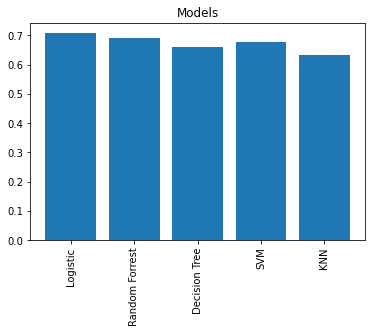

In [5]:
plt.figure()
plt.bar(range(5), scores)
labels = ['Logistic','Random Forrest','Decision Tree','SVM','KNN']
plt.xticks(range(5),labels,rotation='vertical')
plt.title('Models')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

In [6]:
scores

array([0.70822011, 0.68953804, 0.66168478, 0.67595109, 0.63383152])

In [7]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# prob = clf.predict_proba(X_test)
# prob = prob[:,1]

# roc_auc = roc_auc_score(y_test, prob)
# fpr, tpr, thresholds = roc_curve(y_test, prob)

# # plotting the ROC curve
# plt.figure(dpi=100)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# print('Area under the Receiver Operating Characteristic curve:', 
#       roc_auc)

In [8]:
# from sklearn.model_selection import validation_curve
# from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# def PolynomialRegression(degree=7, **kwargs):
#     return make_pipeline(PolynomialFeatures(degree),
#                          LinearRegression(**kwargs))

In [9]:
# degree = np.arange(0, 16)
# train_score, val_score = validation_curve(PolynomialRegression(), X, y,
#                                              param_name='polynomialfeatures__degree', 
#                                              param_range = degree, # what parameters to iterate over
#                                              cv=5, # number of validation folds, can also put in a KFold or StratifiedKFold object here
#                                              scoring = 'r2' # uses R-squared... 1 is perfect, below 0 is worse than guessing mean of training set y-values
#                                          )

# plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
# plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
# plt.legend(loc='best')
# plt.ylim(-.25, 1.25)
# plt.xlabel('degree')
# plt.ylabel('score');
# sns.despine()